In [1]:
# Start writing code here...

# Data Model Final Project

## Video games platform sales prediction 

### 1. Introduction to the problem

The Video Game industry has witnessed exponential growth over the past few decades, becoming a major entertainment sector globally. With advancements in technology and the rise of online gaming platforms, video game sales have become a multi-billion dollar industry. In this context, understanding the factors that contribute to the success or failure of a video game release and sales is crucial for game developers, publishers, and marketers.

### 2. Analytic objective

The aim is to find how performance of model are when predict platform in each year and each continent by using Platform, Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales.  

### 3. Data description and preparation

In [2]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Video_Games_Sales.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gdata = data.iloc[:, np.r_[1:3, 5:10]]
gdata = gdata[~data['Year_of_Release'].isnull() == True]

In [4]:
gdata.isnull().sum()

Platform           0
Year_of_Release    0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [5]:
df = pd.DataFrame(gdata)
df.head()

,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,2006.0,41.36,28.96,3.77,8.45,82.53
1,NES,1985.0,29.08,3.58,6.81,0.77,40.24
2,Wii,2008.0,15.68,12.76,3.79,3.29,35.52
3,Wii,2009.0,15.61,10.93,3.28,2.95,32.77
4,GB,1996.0,11.27,8.89,10.22,1.00,31.37


In [6]:
max_sale = df.groupby(['Year_of_Release','Platform' ]).sum().reset_index()
max_sale

,Year_of_Release,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,2600,10.59,0.67,0.00,0.12,11.38
1,1981.0,2600,33.40,1.96,0.00,0.32,35.77
2,1982.0,2600,26.92,1.65,0.00,0.31,28.86
3,1983.0,2600,5.44,0.34,0.00,0.06,5.83
4,1983.0,NES,2.32,0.46,8.10,0.08,10.96
...,...,...,...,...,...,...,...
236,2016.0,X360,0.69,0.71,0.00,0.12,1.52
237,2016.0,XOne,14.27,9.63,0.01,2.24,26.27
238,2017.0,PS4,0.00,0.00,0.04,0.00,0.04
239,2017.0,PSV,0.00,0.00,0.02,0.00,0.02


In [7]:
# most sell platform in each year of NA_Sales
max_sales_year_NA = max_sale.groupby('Year_of_Release')['NA_Sales'].idxmax()
max_sales_year_NA = max_sale.loc[max_sales_year_NA, ['Platform', 'Year_of_Release', 'NA_Sales']]
max_sales_year_NA.rename(columns={'Platform': 'Platform_NA'}, inplace=True)
max_sales_year_NA

,Platform_NA,Year_of_Release,NA_Sales
0,2600,1980.0,10.59
1,2600,1981.0,33.40
2,2600,1982.0,26.92
3,2600,1983.0,5.44
6,NES,1984.0,33.02
9,NES,1985.0,33.31
12,NES,1986.0,11.87
14,NES,1987.0,6.62
17,NES,1988.0,22.36
20,GB,1989.0,39.81


In [8]:
# most sell platform in each year of EU_Sales
max_sales_year_EU = max_sale.groupby('Year_of_Release')['EU_Sales'].idxmax()
max_sales_year_EU = max_sale.loc[max_sales_year_EU, ['Platform', 'Year_of_Release', 'EU_Sales']]
max_sales_year_EU.rename(columns={'Platform': 'Platform_EU'}, inplace=True)
max_sales_year_EU

,Platform_EU,Year_of_Release,EU_Sales
0,2600,1980.0,0.67
1,2600,1981.0,1.96
2,2600,1982.0,1.65
4,NES,1983.0,0.46
6,NES,1984.0,2.09
9,NES,1985.0,4.68
12,NES,1986.0,2.80
14,NES,1987.0,1.32
17,NES,1988.0,6.30
20,GB,1989.0,7.60


In [9]:
# most sell platform in each year of JP_Sales
max_sales_year_JP = max_sale.groupby('Year_of_Release')['JP_Sales'].idxmax()
max_sales_year_JP = max_sale.loc[max_sales_year_JP, ['Platform', 'Year_of_Release', 'JP_Sales']]
max_sales_year_JP.rename(columns={'Platform': 'Platform_JP'}, inplace=True)
max_sales_year_JP

,Platform_JP,Year_of_Release,JP_Sales
0,2600,1980.0,0.00
1,2600,1981.0,0.00
2,2600,1982.0,0.00
4,NES,1983.0,8.10
6,NES,1984.0,14.27
9,NES,1985.0,14.54
12,NES,1986.0,19.81
14,NES,1987.0,11.63
17,NES,1988.0,15.41
20,GB,1989.0,16.16


In [10]:
# most sell platform in each year of Other_Sales
max_sales_year_Other = max_sale.groupby('Year_of_Release')['Other_Sales'].idxmax()
max_sales_year_Other = max_sale.loc[max_sales_year_Other, ['Platform', 'Year_of_Release', 'Other_Sales']]
max_sales_year_Other.rename(columns={'Platform': 'Platform_Other'}, inplace=True)
max_sales_year_Other

,Platform_Other,Year_of_Release,Other_Sales
0,2600,1980.0,0.12
1,2600,1981.0,0.32
2,2600,1982.0,0.31
4,NES,1983.0,0.08
6,NES,1984.0,0.70
9,NES,1985.0,0.91
12,NES,1986.0,1.93
14,NES,1987.0,0.19
17,NES,1988.0,0.94
20,GB,1989.0,1.40


In [11]:
# most sell platform in each year of Global_Sales
max_sales_year_Global = max_sale.groupby('Year_of_Release')['Global_Sales'].idxmax()
max_sales_year_Global = max_sale.loc[max_sales_year_Global, ['Platform', 'Year_of_Release', 'Global_Sales']]
max_sales_year_Global.rename(columns={'Platform': 'Platform_Global'}, inplace=True)
max_sales_year_Global

,Platform_Global,Year_of_Release,Global_Sales
0,2600,1980.0,11.38
1,2600,1981.0,35.77
2,2600,1982.0,28.86
4,NES,1983.0,10.96
6,NES,1984.0,50.09
9,NES,1985.0,53.44
12,NES,1986.0,36.41
14,NES,1987.0,19.76
17,NES,1988.0,45.01
20,GB,1989.0,64.98


### 4. Data exploration and visualization

In [12]:
print('Platform:\n', gdata['Platform'].unique())

Platform:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [13]:
print('Year of release :\n', gdata['Year_of_Release'].unique())

Year of release :
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983. 2020. 2017.]


In [14]:
print('Max year: ', gdata['Year_of_Release'].max())
print('Min year: ', gdata['Year_of_Release'].min())
print('Null Values: ', gdata['Year_of_Release'].isnull().any())

Max year:  2020.0
Min year:  1980.0
Null Values:  False


In [15]:
# Show all plantform of each continent that have most sale of each year
merged_df = pd.merge(max_sales_year_NA, max_sales_year_EU,on='Year_of_Release')
merged_df1 = pd.merge(merged_df, max_sales_year_JP,on='Year_of_Release')
merged_df2 = pd.merge(merged_df1, max_sales_year_Other,on='Year_of_Release')
merged_df3 = pd.merge(merged_df2, max_sales_year_Global,on='Year_of_Release')

loc_all = merged_df3.loc[:,['Year_of_Release','Platform_NA','Platform_EU','Platform_JP','Platform_Other','Platform_Global']]
loc_all

,Year_of_Release,Platform_NA,Platform_EU,Platform_JP,Platform_Other,Platform_Global
0,1980.0,2600,2600,2600,2600,2600
1,1981.0,2600,2600,2600,2600,2600
2,1982.0,2600,2600,2600,2600,2600
3,1983.0,2600,NES,NES,NES,NES
4,1984.0,NES,NES,NES,NES,NES
5,1985.0,NES,NES,NES,NES,NES
6,1986.0,NES,NES,NES,NES,NES
7,1987.0,NES,NES,NES,NES,NES
8,1988.0,NES,NES,NES,NES,NES
9,1989.0,GB,GB,GB,GB,GB


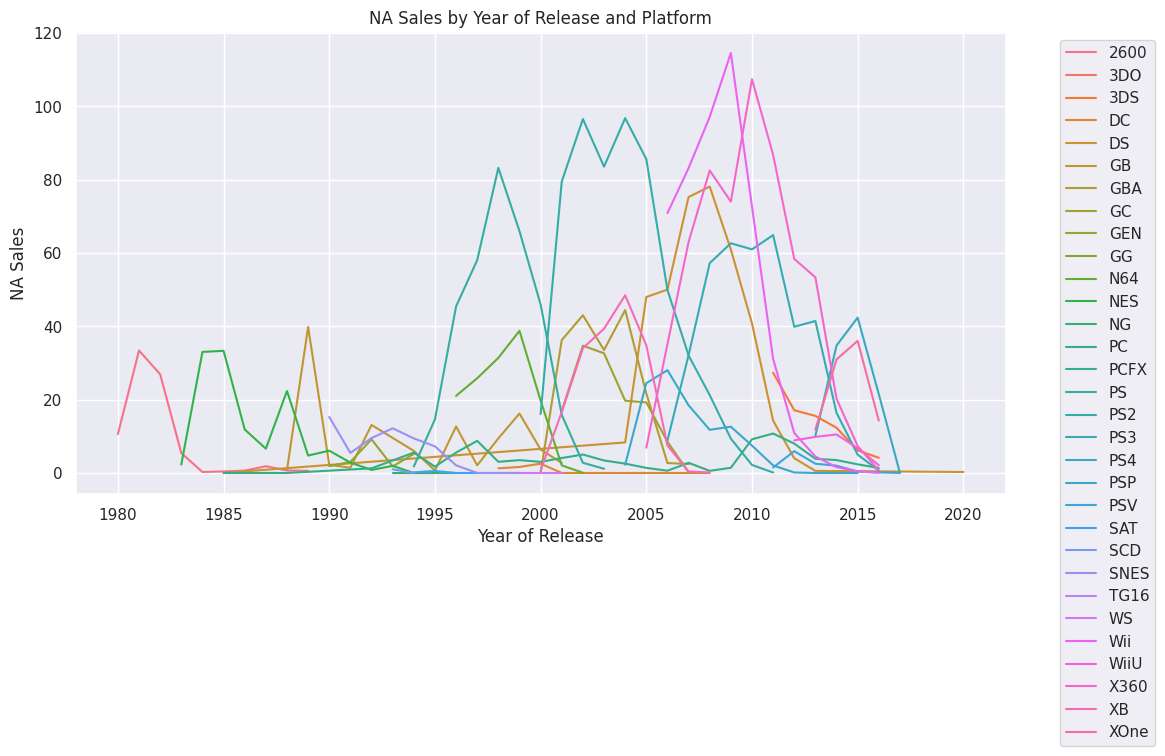

In 1980 on platform 2600, the total NA sales was 10.59 million units.
In 1981 on platform 2600, the total NA sales was 33.40 million units.
In 1982 on platform 2600, the total NA sales was 26.92 million units.
In 1983 on platform 2600, the total NA sales was 5.44 million units.
In 1984 on platform 2600, the total NA sales was 0.26 million units.
In 1985 on platform 2600, the total NA sales was 0.42 million units.
In 1986 on platform 2600, the total NA sales was 0.63 million units.
In 1987 on platform 2600, the total NA sales was 1.84 million units.
In 1988 on platform 2600, the total NA sales was 0.69 million units.
In 1989 on platform 2600, the total NA sales was 0.59 million units.
In 1994 on platform 3DO, the total NA sales was 0.00 million units.
In 1995 on platform 3DO, the total NA sales was 0.00 million units.
In 2011 on platform 3DS, the total NA sales was 27.34 million units.
In 2012 on platform 3DS, the total NA sales was 17.11 million units.
In 2013 on platform 3DS, the tota

In [23]:
# NA Sales by Year of Release and Platform
grouped_data = df.groupby(['Platform', 'Year_of_Release'])['NA_Sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year_of_Release', y='NA_Sales', hue='Platform', errorbar=None)
plt.xlabel('Year of Release')
plt.ylabel('NA Sales')
plt.title('NA Sales by Year of Release and Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the results in text format
for index, row in grouped_data.iterrows():
    print(f"In {int(row['Year_of_Release'])} on platform {row['Platform']}, the total NA sales was {row['NA_Sales']:.2f} million units.")

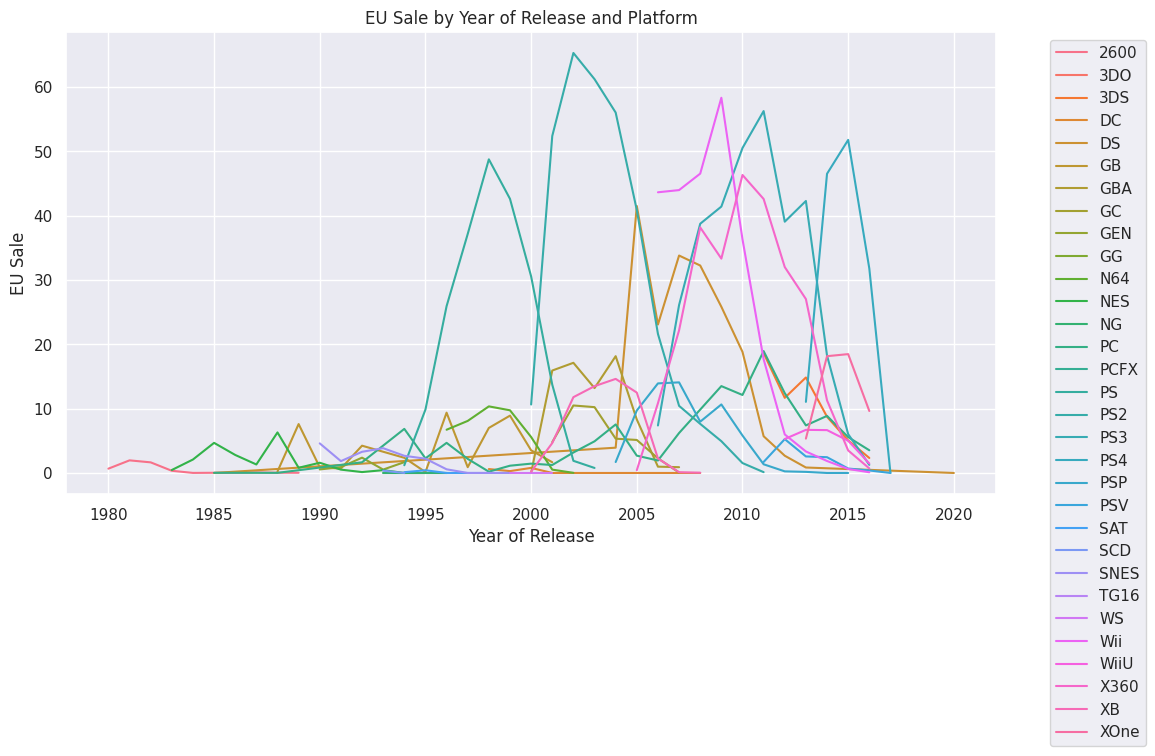

In 1980 on platform 2600, the total EU sales was 0.67 million units.
In 1981 on platform 2600, the total EU sales was 1.96 million units.
In 1982 on platform 2600, the total EU sales was 1.65 million units.
In 1983 on platform 2600, the total EU sales was 0.34 million units.
In 1984 on platform 2600, the total EU sales was 0.01 million units.
In 1985 on platform 2600, the total EU sales was 0.03 million units.
In 1986 on platform 2600, the total EU sales was 0.04 million units.
In 1987 on platform 2600, the total EU sales was 0.09 million units.
In 1988 on platform 2600, the total EU sales was 0.04 million units.
In 1989 on platform 2600, the total EU sales was 0.03 million units.
In 1994 on platform 3DO, the total EU sales was 0.00 million units.
In 1995 on platform 3DO, the total EU sales was 0.00 million units.
In 2011 on platform 3DS, the total EU sales was 18.63 million units.
In 2012 on platform 3DS, the total EU sales was 11.68 million units.
In 2013 on platform 3DS, the total E

In [24]:
# EU Sale by Year of Release and Platform
grouped_data = df.groupby(['Platform', 'Year_of_Release'])['EU_Sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year_of_Release', y='EU_Sales', hue='Platform', errorbar=None)
plt.xlabel('Year of Release')
plt.ylabel('EU Sale')
plt.title('EU Sale by Year of Release and Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the results in text format
for index, row in grouped_data.iterrows():
    print(f"In {int(row['Year_of_Release'])} on platform {row['Platform']}, the total EU sales was {row['EU_Sales']:.2f} million units.")

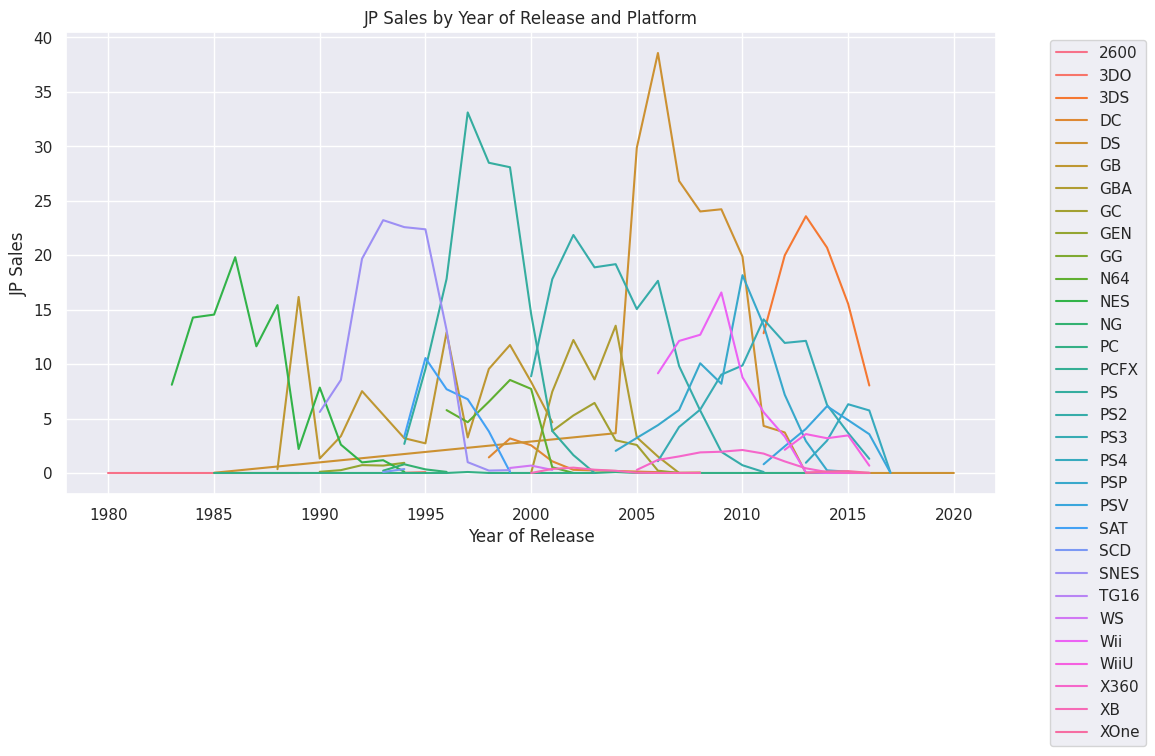

In 1980 on platform 2600, the total JP sales was 0.00 million units.
In 1981 on platform 2600, the total JP sales was 0.00 million units.
In 1982 on platform 2600, the total JP sales was 0.00 million units.
In 1983 on platform 2600, the total JP sales was 0.00 million units.
In 1984 on platform 2600, the total JP sales was 0.00 million units.
In 1985 on platform 2600, the total JP sales was 0.00 million units.
In 1986 on platform 2600, the total JP sales was 0.00 million units.
In 1987 on platform 2600, the total JP sales was 0.00 million units.
In 1988 on platform 2600, the total JP sales was 0.00 million units.
In 1989 on platform 2600, the total JP sales was 0.00 million units.
In 1994 on platform 3DO, the total JP sales was 0.02 million units.
In 1995 on platform 3DO, the total JP sales was 0.08 million units.
In 2011 on platform 3DS, the total JP sales was 12.83 million units.
In 2012 on platform 3DS, the total JP sales was 19.98 million units.
In 2013 on platform 3DS, the total J

In [25]:
# JP Sales by Year of Release and Platform
grouped_data = df.groupby(['Platform', 'Year_of_Release'])['JP_Sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year_of_Release', y='JP_Sales', hue='Platform', errorbar=None)
plt.xlabel('Year of Release')
plt.ylabel('JP Sales')
plt.title('JP Sales by Year of Release and Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the results in text format
for index, row in grouped_data.iterrows():
    print(f"In {int(row['Year_of_Release'])} on platform {row['Platform']}, the total JP sales was {row['JP_Sales']:.2f} million units.")

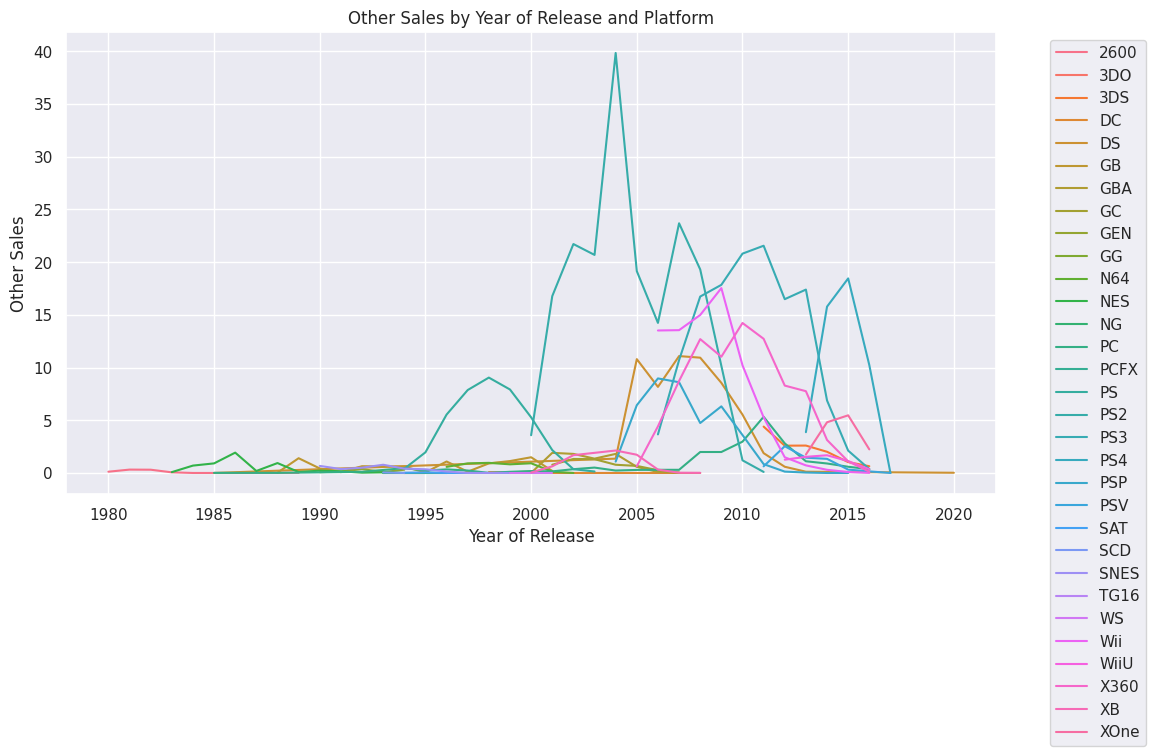

In 1980 on platform 2600, the total other sales was 0.12 million units.
In 1981 on platform 2600, the total other sales was 0.32 million units.
In 1982 on platform 2600, the total other sales was 0.31 million units.
In 1983 on platform 2600, the total other sales was 0.06 million units.
In 1984 on platform 2600, the total other sales was 0.00 million units.
In 1985 on platform 2600, the total other sales was 0.00 million units.
In 1986 on platform 2600, the total other sales was 0.00 million units.
In 1987 on platform 2600, the total other sales was 0.01 million units.
In 1988 on platform 2600, the total other sales was 0.01 million units.
In 1989 on platform 2600, the total other sales was 0.01 million units.
In 1994 on platform 3DO, the total other sales was 0.00 million units.
In 1995 on platform 3DO, the total other sales was 0.00 million units.
In 2011 on platform 3DS, the total other sales was 4.40 million units.
In 2012 on platform 3DS, the total other sales was 2.59 million uni

In [26]:
# Other Sales by Year of Release and Platform
grouped_data = df.groupby(['Platform', 'Year_of_Release'])['Other_Sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year_of_Release', y='Other_Sales', hue='Platform', errorbar=None)
plt.xlabel('Year of Release')
plt.ylabel('Other Sales')
plt.title('Other Sales by Year of Release and Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the results in text format
for index, row in grouped_data.iterrows():
    print(f"In {int(row['Year_of_Release'])} on platform {row['Platform']}, the total other sales was {row['Other_Sales']:.2f} million units.")

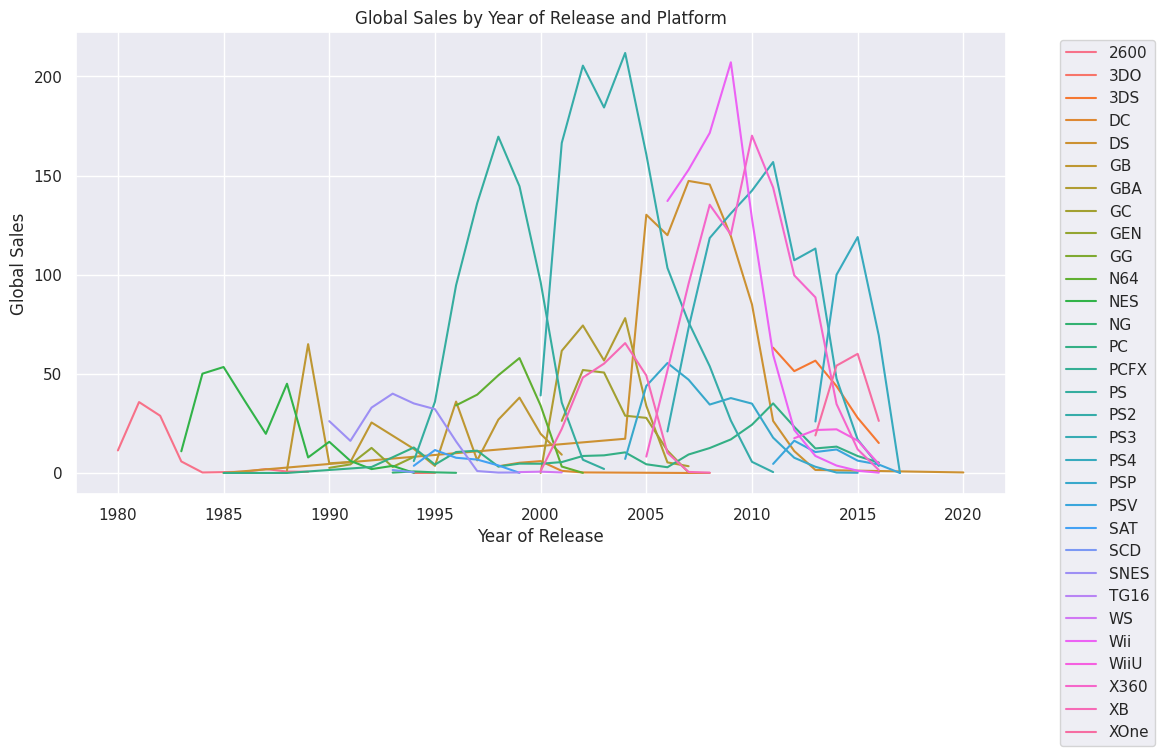

In 1980 on platform 2600, the total Global sales was 11.38 million units.
In 1981 on platform 2600, the total Global sales was 35.77 million units.
In 1982 on platform 2600, the total Global sales was 28.86 million units.
In 1983 on platform 2600, the total Global sales was 5.83 million units.
In 1984 on platform 2600, the total Global sales was 0.27 million units.
In 1985 on platform 2600, the total Global sales was 0.45 million units.
In 1986 on platform 2600, the total Global sales was 0.66 million units.
In 1987 on platform 2600, the total Global sales was 1.98 million units.
In 1988 on platform 2600, the total Global sales was 0.75 million units.
In 1989 on platform 2600, the total Global sales was 0.62 million units.
In 1994 on platform 3DO, the total Global sales was 0.02 million units.
In 1995 on platform 3DO, the total Global sales was 0.08 million units.
In 2011 on platform 3DS, the total Global sales was 63.17 million units.
In 2012 on platform 3DS, the total Global sales wa

In [27]:
# Global Sales by Year of Release and Platform
grouped_data = df.groupby(['Platform', 'Year_of_Release'])['Global_Sales'].sum().reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Year_of_Release', y='Global_Sales', hue='Platform', errorbar=None)
plt.xlabel('Year of Release')
plt.ylabel('Global Sales')
plt.title('Global Sales by Year of Release and Platform')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the results in text format
for index, row in grouped_data.iterrows():
    print(f"In {int(row['Year_of_Release'])} on platform {row['Platform']}, the total Global sales was {row['Global_Sales']:.2f} million units.")

### 5. Model explanation

We used Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Platform to make a model by using Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales to be feature and used Platform to be a target. The dataset is divided into training and testing sets using the train_test_split function, with 70% of the data used for training and 30% for testing. Before training the model, the features are scaled using the StandardScaler to ensure they have similar ranges and using DecisionTreeClassifier to predict.

### 6. Modeling implementation

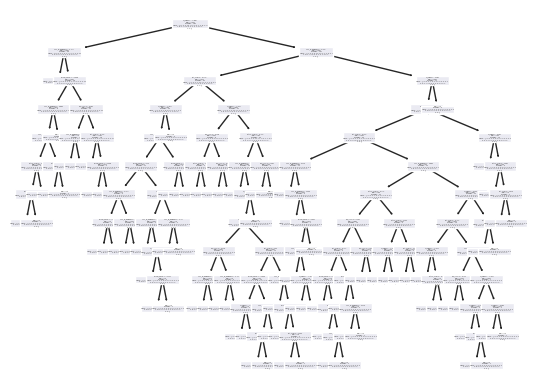

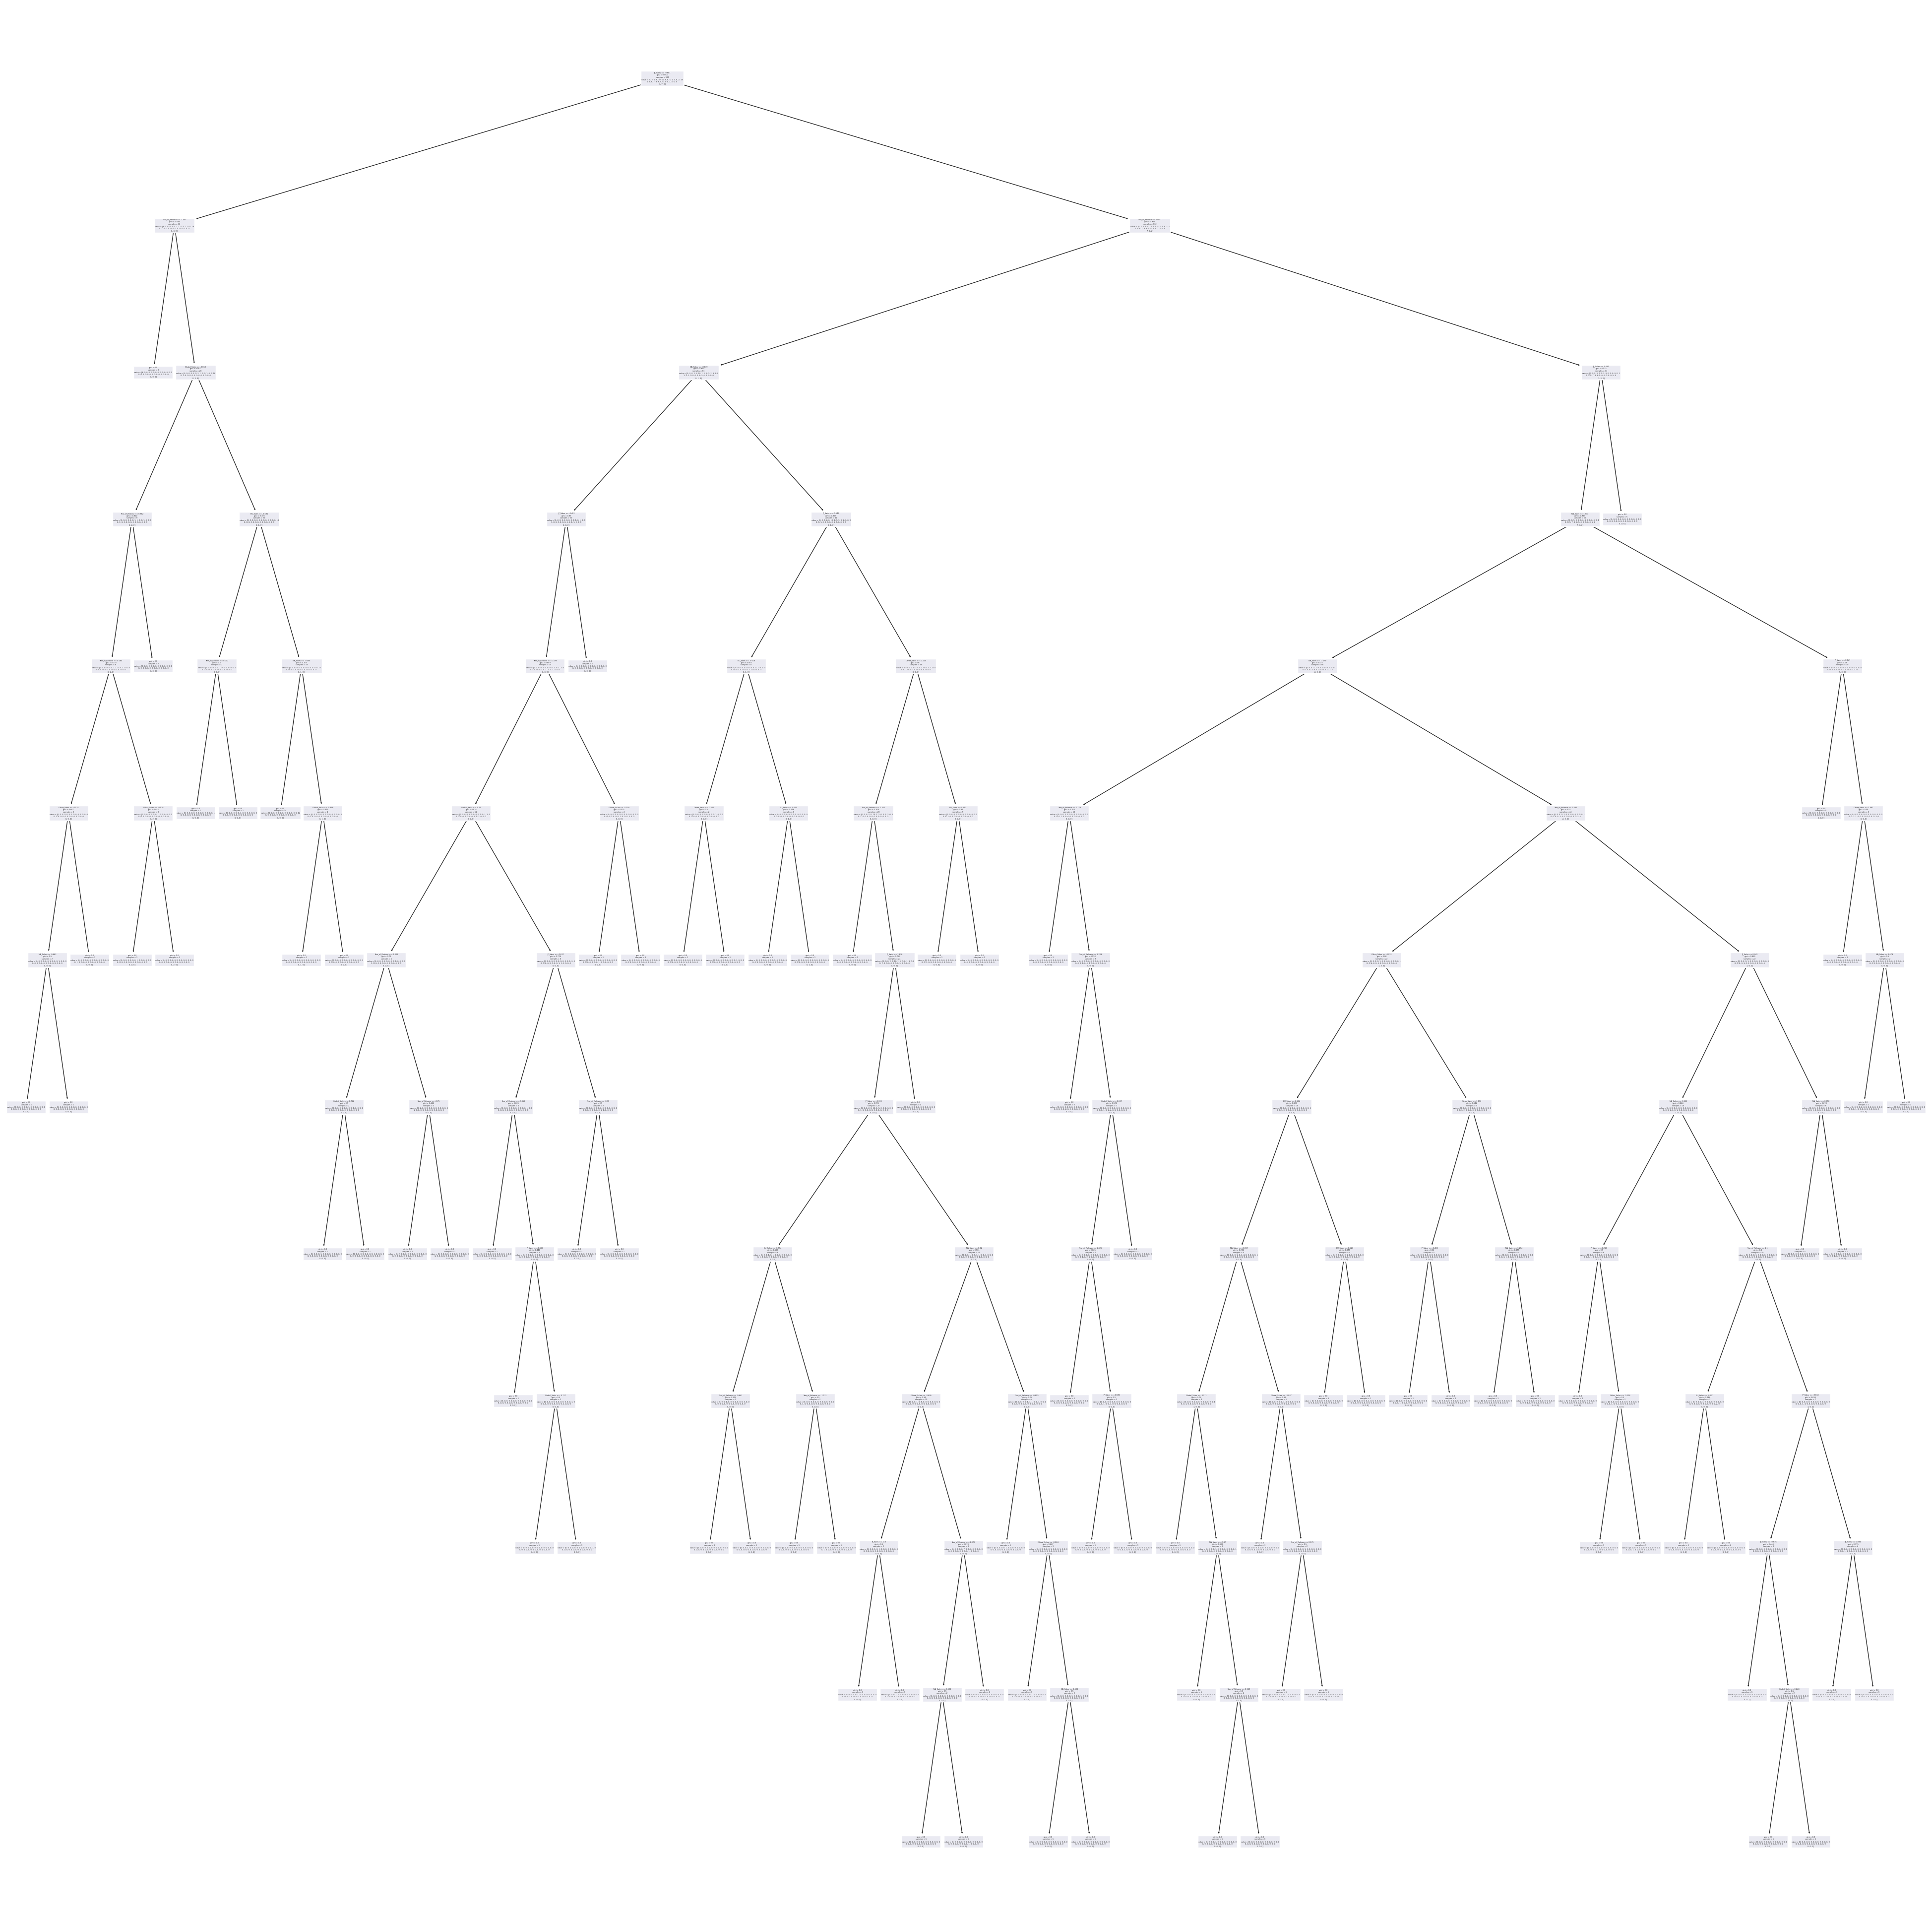

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import sys
import matplotlib.pyplot as plt

features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
target = 'Platform'

X = max_sale[features]
y = max_sale[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

tree.plot_tree(clf, feature_names=features)

plt.show()
sys.stdout.flush()

plt.figure(figsize=(50,50))
tree.plot_tree(clf, feature_names=features)
plt.savefig('tree_high_res.png', dpi=300)



### 7. Evaluation

In [22]:
# Accuracy
# measures the proportion of correctly classified samples over the total number of samples.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Precision
# measures the proportion of correctly predicted positive samples out of the total predicted positive samples.
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
print("Precision:", precision)

# Recall
# measures the proportion of correctly predicted positive samples out of the total actual positive samples.
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='weighted', zero_division=1)
print("Recall:", recall)

# F1-Score
# combines precision and recall into a single metric by taking their harmonic mean.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions, average='weighted', zero_division=1)
print("F1:", f1)

# Classification Report
# provides a comprehensive summary of precision, recall, F1-score, and support for each class.
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions, zero_division=1)
print("Classification Report::", report)

Accuracy: 0.4246575342465753
Precision: 0.5397260273972603
Recall: 0.4246575342465753
F1: 0.4213174952900981
Classification Report::               precision    recall  f1-score   support

        2600       0.50      1.00      0.67         2
         3DS       1.00      1.00      1.00         1
          DC       1.00      0.50      0.67         2
          DS       0.00      0.00      0.00         2
          GB       0.33      0.33      0.33         3
         GBA       0.33      0.33      0.33         3
          GC       1.00      1.00      1.00         1
         GEN       0.00      1.00      0.00         0
         N64       0.67      0.50      0.57         4
         NES       0.67      0.50      0.57         4
          NG       1.00      0.00      0.00         2
          PC       0.67      0.57      0.62         7
          PS       0.67      0.50      0.57         4
         PS2       0.40      0.33      0.36         6
         PS3       0.50      0.75      0.60         4
  

### 8. Discussion and conclusion

Discussion:

The analysis offered valuable insights into the video game industry, revealing key factors influencing the success of game releases. Variations in sales across different platforms, years, and regions emphasized the need for region-specific marketing strategies. The Decision Tree model was able to predict gaming platforms based on these factors, but the limitations of this model, like potential overfitting, should be kept in mind.

Conclusion:

Our study delivers crucial understandings of video game industry trends and aids in decision-making for game developers and marketers. In our data modeling we have an accuracy of 40% which is typical of the gaming market. The supply and demand can be adjusted at any time. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=040be1e8-7983-44ec-98ae-f67a260b2fae' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>